<a href="https://colab.research.google.com/github/HwangHanJae/open_cv_pratice/blob/main/opencv_tuto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#opencv 라이브러리 로드
import cv2
import matplotlib.pyplot as plt

#이미지 불러오기 및 변경

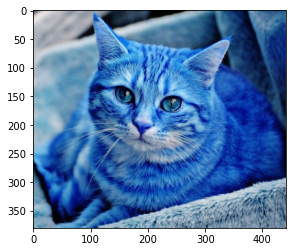

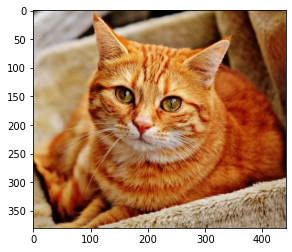

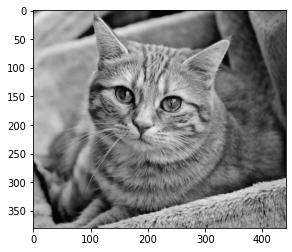

In [ ]:
#이미지 불러오기
cat_url = "/content/cat.jpg"
img = cv2.imread(cat_url, cv2.IMREAD_COLOR)
#BGR로 출력시
plt.imshow(img)
plt.show()

#이미지를 matplotlib 형식에 맞게 RGB로 변경
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

#이미지를 흑백으로 변경
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
plt.imshow(img)
plt.show()

# 이미지 연산

In [ ]:
img = cv2.imread(cat_url, cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#픽셀 수 및 이미지 크기 확인
print(img.shape)
print(img.size)

#이미지의 특정 픽셀 출력
px = img[100,100]
print(px)


(380, 441, 3)
502740
[179 151 111]


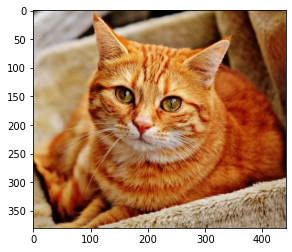

시간 :  0.24668240547180176


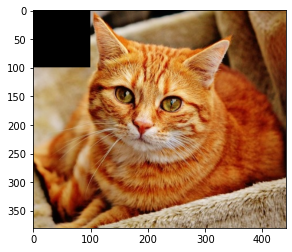

시간 :  0.2483670711517334


In [ ]:
import time

start_time = time.time()
for i in range(100):
  for j in range(100):
    img[i,j] == [255, 255,255]

plt.imshow(img)
plt.show()
print("시간 : ", time.time()-start_time)


start_time = time.time()
img[0:100, 0:100] = [0,0,0]
plt.imshow(img)
plt.show()
print("시간 : ", time.time()-start_time)

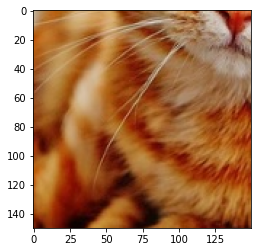

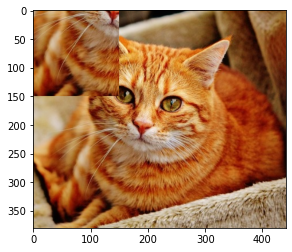

In [ ]:
# roi
roi = img[200:350, 50:200]
plt.imshow(roi)
plt.show()

img[0:150, 0:150] = roi
plt.imshow(img)
plt.show()

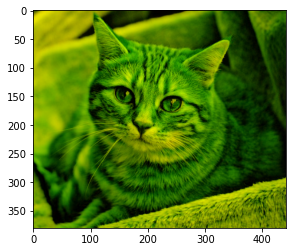

In [ ]:
#색상 바꾸기
img = cv2.imread(cat_url, cv2.IMREAD_COLOR)
img[:,:,2]= 0 
plt.imshow(img)
plt.show()

#이미지 변형

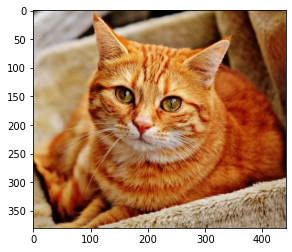

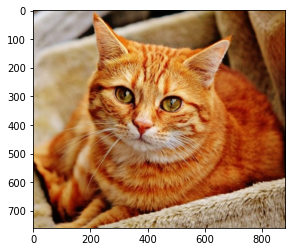

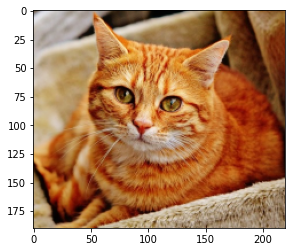

In [ ]:
img = cv2.imread(cat_url, cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


plt.imshow(img)
plt.show()

#이미지 키우기
expand_img = cv2.resize(img, None, fx=2.0, fy=2.0, interpolation=cv2.INTER_CUBIC)
plt.imshow(expand_img)
plt.show()

shrink_img = cv2.resize(img, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)
plt.imshow(shrink_img)
#plt.show()

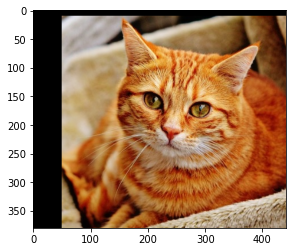

In [ ]:
#이미지 위치 이동
import numpy as np
img = cv2.imread(cat_url, cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

height, width = img.shape[:2]

#x로 50, y로 10만큼
m = np.float32([[1,0,50],[0,1,10]])
dst = cv2.warpAffine(img, m, (width, height))

plt.imshow(dst)
plt.show()

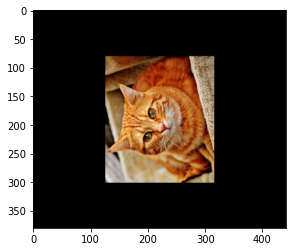

In [ ]:
#이미지 회전
img = cv2.imread(cat_url, cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

height, width = img.shape[:2]
#회전 중심값을 너비의 중간, 높이의 중간으로 선택
#회전각도를 90으로 설정
#크기를 반으로 줄임
m = cv2.getRotationMatrix2D((width/2, height/2), 90, 0.5)
dst = cv2.warpAffine(img, m, (width, height))
plt.imshow(dst)
plt.show()

#이미지 합치기

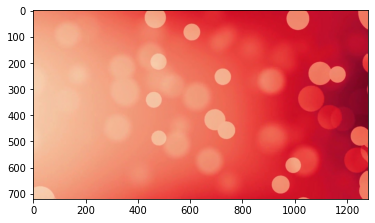

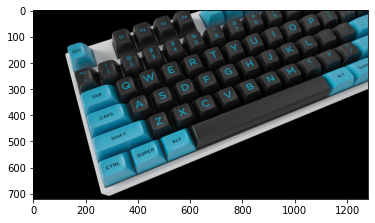

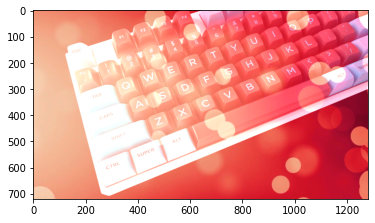

In [ ]:
img1_path = "/content/image_1.jpg"
img2_path = "/content/image_2.png"
img1 = cv2.imread(img1_path)
img2 = cv2.imread(img2_path)
img1= cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

plt.imshow(img1)
plt.show()

plt.imshow(img2)
plt.show()

result = cv2.add(img1, img2)
plt.imshow(result)
plt.show()

#임계점 처리하기

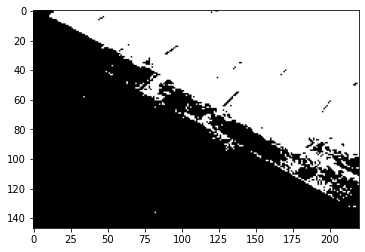

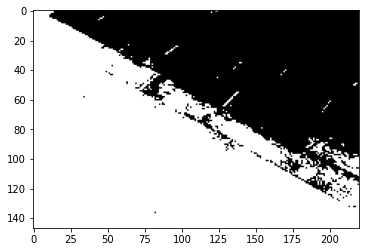

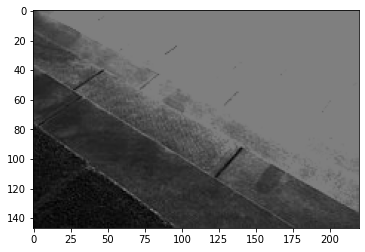

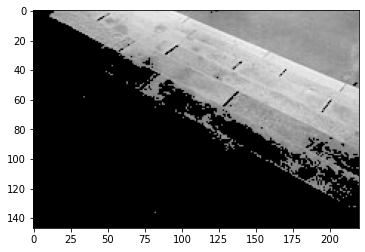

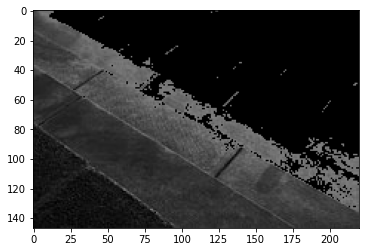

In [ ]:
img = cv2.imread("/content/gray_image.jpg",cv2.IMREAD_GRAYSCALE)

imgs  = []

ret, thres1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
ret, thres2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
ret, thres3 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
ret, thres4 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
ret, thres5 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)
imgs.append(thres1)
imgs.append(thres2)
imgs.append(thres3)
imgs.append(thres4)
imgs.append(thres5)

for i in imgs:
  plt.imshow(cv2.cvtColor(i, cv2.COLOR_GRAY2RGB))
  plt.show()

## 적응 임계점 처리

`cv2.adaptiveThreshold(image, max_value, apdaptive_method, type, bolck_size, C)`

- max_value : 임계 값을 넘었을 때 적용할 값
- adaptive_method : 임계 값을 결정하는 계산방법
 - ADAPTIVE_THRESH_MEAN_C : 주변영역의 평균값 결정
 - ADAPTIVE_THRESH_GAUSSIAN_C
- type : 임계점을 처리하는 방식
- block_size : 임계 값을 적용할 영역의 크기
- C : 평균이나 가중 평균에서 차감할 값

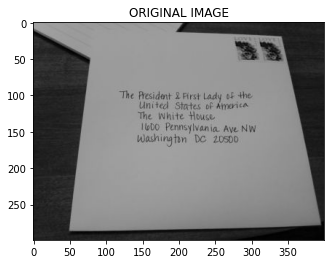

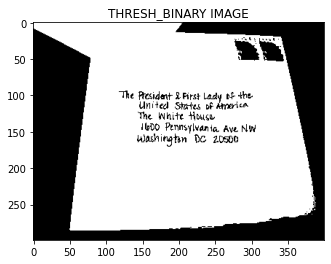

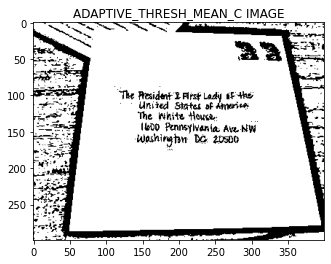

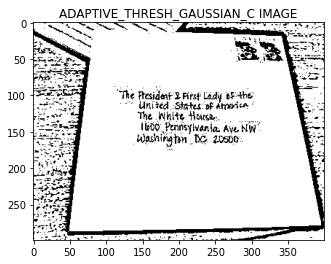

In [ ]:
img_path = "/content/hand_writing_image.jpg"
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

#원본 이미지
plt.imshow(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB))
plt.title("ORIGINAL IMAGE")
plt.show()

#THRESH_BINARY
ret, thres1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
plt.imshow(cv2.cvtColor(thres1, cv2.COLOR_GRAY2RGB))
plt.title("THRESH_BINARY IMAGE")
plt.show()

#적응 임계점 처리 방식
#ADAPTIVE_THRESH_MEAN_C
thres2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 3)
plt.imshow(cv2.cvtColor(thres2, cv2.COLOR_GRAY2RGB))
plt.title("ADAPTIVE_THRESH_MEAN_C IMAGE")
plt.show()

#ADAPTIVE_THRESH_GAUSSIAN_C
thres3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 21, 3)
plt.imshow(cv2.cvtColor(thres3, cv2.COLOR_GRAY2RGB))
plt.title("ADAPTIVE_THRESH_GAUSSIAN_C IMAGE")
plt.show()

#  도형그리기

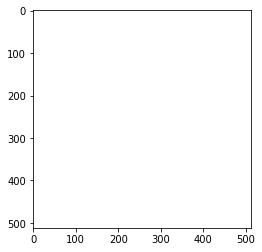

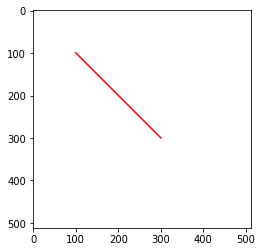

In [ ]:
img = np.full((512,512,3), 255, np.uint8)
plt.imshow(img)
plt.show()
img = cv2.line(img, (100,100), (300, 300), (255, 0, 0), 3)

plt.imshow(img)
plt.show()

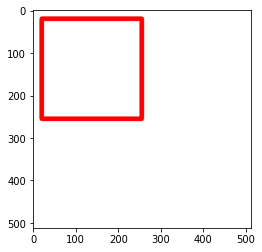

In [ ]:
image = np.full((512,512,3), 255, np.uint8)
image = cv2.rectangle(image, (20, 20), (255, 255), (255, 0, 0), 10)
plt.imshow(image)
plt.show()

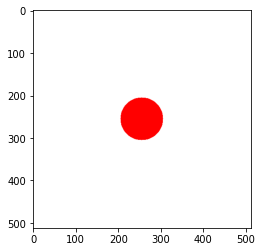

In [ ]:
image = np.full((512,512,3), 255, np.uint8)
image = cv2.circle(image, (255,255), 50, (255, 0, 0), -1)
plt.imshow(image)
plt.show()

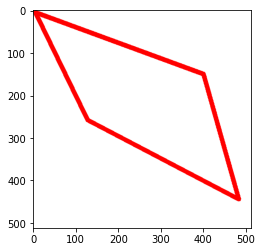

In [ ]:
image = np.full((512,512,3), 255, np.uint8)
points = np.array([[5,5],[128, 258], [483, 444], [400, 150]])
image = cv2.polylines(image, [points], True, (255, 0, 0), 10)
plt.imshow(image)
plt.show()

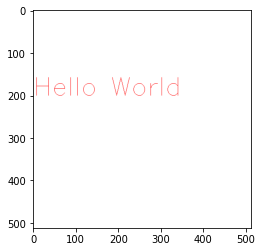

In [ ]:
image = np.full((512,512,3), 255, np.uint8)

image = cv2.putText(image, "Hello World", (0, 200), cv2.FONT_ITALIC, 2, (255, 0, 0))
plt.imshow(image)
plt.show()

# findContours(이미지에서 Contour들을 찾는 함수)

- mode : Contour들을 찾는 방법
  - RETR_EXTERNAL : 바깥쪽 Line만 찾기
  - RETR_LIST : 모든 Line을 찾지만, Hierachy 구성 X
  - RETR_TREE : 모든 Line을 찾으며, 모든 Hierachy 구성 O
- method : Contour들을 찾는 근사치 방법
  - CHAIN_APPROX_NONE : 모든 Contour 포인트 저장
  - CHAIN_APPROX_SIMPLE : Contour Line을 그릴 수 있는 포인트만 저장

# drawContours(Contours들을 그리는 함수)
  - contours_index : 그리고자 하는 Contours Line(전체 : -1)

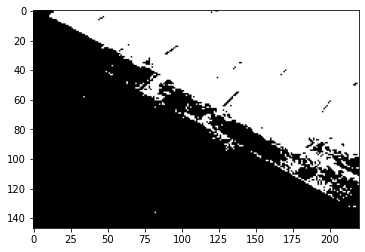

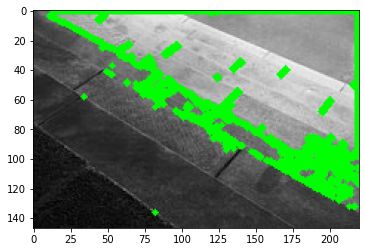

In [ ]:
image = cv2.imread("/content/gray_image.jpg")
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(image_gray, 127, 255, 0)

plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_GRAY2RGB))
plt.show()

contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
image1 = cv2.drawContours(image, contours, -1, (0, 255, 0), 4)

plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.show()

# boundingRect(contour) - Contour를 포함하는 사각형을 그립니다
- 사각형의 x, y 좌표와 너비, 높이를 반환

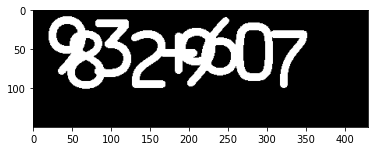

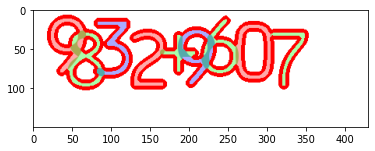

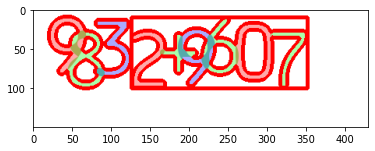

In [ ]:
image = cv2.imread("/content/digit_image.png")
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(image_gray, 230, 255, 0)
thresh = cv2.bitwise_not(thresh)

plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_GRAY2RGB))
plt.show()

contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
image = cv2.drawContours(image, contours, -1, (0, 0, 255), 4)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

contour = contours[0]
x, y, w, h = cv2.boundingRect(contour)
image = cv2.rectangle(image, (x,y), (x+w, y+h), (0, 0, 255),3)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

#convexHull(contour) - ConvexHull 알고리즘으로 외곽을 구하는 함수

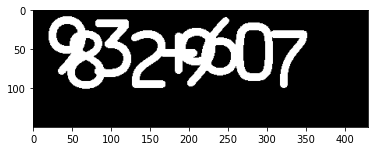

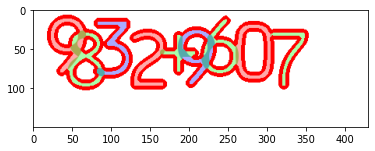

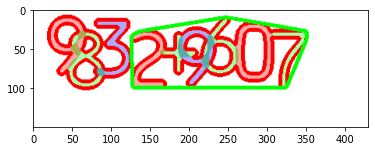

In [ ]:
image = cv2.imread("/content/digit_image.png")
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(image_gray, 230, 255, 0)
thresh = cv2.bitwise_not(thresh)

plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_GRAY2RGB))
plt.show()

contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
image = cv2.drawContours(image, contours, -1, (0, 0, 255), 4)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

contour = contours[0]
hull = cv2.convexHull(contour)
image = cv2.drawContours(image, [hull], -1, (0, 255, 0),4)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

# approxPolyDP(curve, epsilon, closed) - 근사치 Contour를 구합니다.
- curve : contour
- epsilon : 최대거리 (클수록 Point 개수 감소)
- closed : 폐곡선 여부

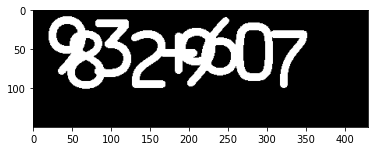

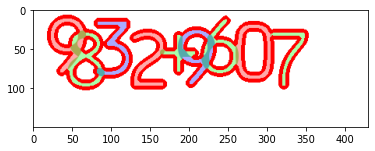

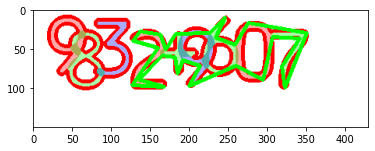

In [ ]:
image = cv2.imread("/content/digit_image.png")
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(image_gray, 230, 255, 0)
thresh = cv2.bitwise_not(thresh)

plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_GRAY2RGB))
plt.show()

contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
image = cv2.drawContours(image, contours, -1, (0, 0, 255), 4)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

contour = contours[0]
epsilon = cv2.arcLength(contour, True) * 0.01
approx = cv2.approxPolyDP(contour, epsilon, True)
image = cv2.drawContours(image, [approx], -1, (0, 255, 0), 4)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

# 이미지필터링

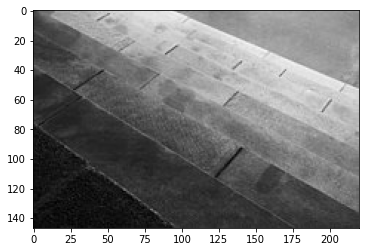

[[0.0625 0.0625 0.0625 0.0625]
 [0.0625 0.0625 0.0625 0.0625]
 [0.0625 0.0625 0.0625 0.0625]
 [0.0625 0.0625 0.0625 0.0625]]


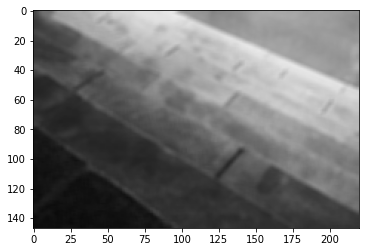

In [ ]:
image = cv2.imread("/content/gray_image.jpg")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

size = 4
kernel = np.ones((size, size), np.float32) / (size ** 2)
print(kernel)

dst = cv2.filter2D(image, -1, kernel)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()

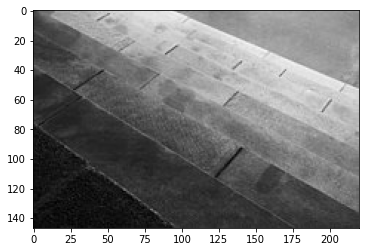

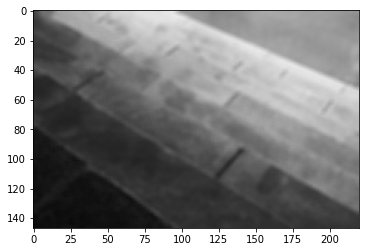

In [ ]:
image = cv2.imread("/content/gray_image.jpg")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

dst = cv2.blur(image, (4,4))
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()

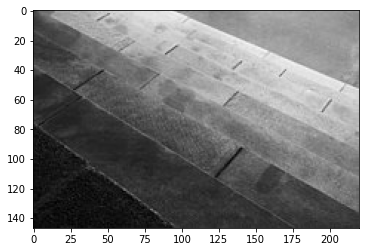

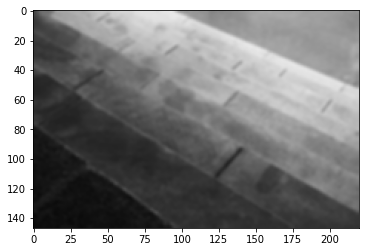

In [ ]:
image = cv2.imread("/content/gray_image.jpg")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

dst = cv2.GaussianBlur(image, (5,5), 0)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()